<a href="https://colab.research.google.com/github/TheClassicTechno/FutureMakers2022/blob/main/day9/Julia_Huang_of_Day_9_Introduction_to_Loss_Functions_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

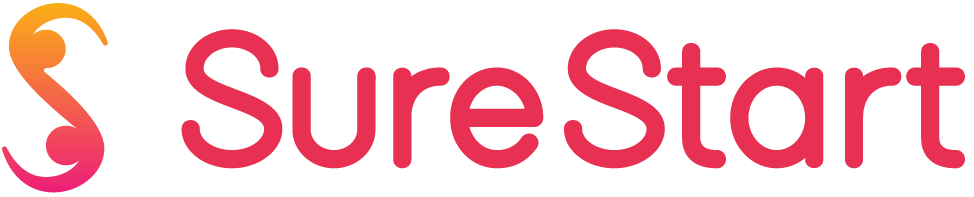

#Day 9 Objectives: 
* To introduce you to loss functions. 


# Loss Functions

Loss functions define what a good prediction is and isn’t. Choosing the right loss function dictates how well your estimator (machine learning model) will be. The criteria by which an estimator is scrutinized is its performance - how accurate the model's decisions are. This calls for a way to measure how far a particular iteration of the model is from the actual values. This is where loss functions come into play.

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs. Loss functions are not fixed, they change depending on the task in hand and the goal to be met.

Worth to note we can speak of different kind of loss functions: **regression loss** functions and **classification loss** functions.

Regression loss function describes the difference between the values that a model is predicting and the actual values of the labels. So the loss function has a meaning on a labeled data when we compare the prediction to the label at a single point of time. This loss function is often called the error function or the error formula. Typical error functions we use for regression models are L1 and L2, Huber loss, Quantile loss, log cosh loss.

**Note**: L1 loss is also know as Mean Absolute Error. L2 Loss is also know as Mean Square Error or Quadratic loss.

Loss functions for classification represent the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). To name a few: log loss, focal loss, exponential loss, hinge loss, relative entropy loss and other.

*Note*: While more commonly used in regression, the square loss function can be re-written and utilized for classification.

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Regression Losses

Remember, in regression, the output would be a real value. We need some loss functions which compares two real values.

In [3]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

65536/57026 [==================================] - 0s 0us/step


## Mean Squared Error [MSE]

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction. 

However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first square the difference between the original and estimated output with $(y_i - \hat{y}_i)^2$. Then we take sum of the squared difference for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

In [4]:
model = keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 3s 18ms/step - loss: 584.6030 - mse: 584.6030 - val_loss: 484.4558 - val_mse: 484.4558
Epoch 2/250
12/12 [==============================] - 0s 4ms/step - loss: 558.2201 - mse: 558.2201 - val_loss: 459.8010 - val_mse: 459.8010
Epoch 3/250
12/12 [==============================] - 0s 4ms/step - loss: 525.1041 - mse: 525.1041 - val_loss: 427.7874 - val_mse: 427.7874
Epoch 4/250
12/12 [==============================] - 0s 4ms/step - loss: 480.4658 - mse: 480.4658 - val_loss: 381.4184 - val_mse: 381.4184
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 415.4464 - mse: 415.4464 - val_loss: 313.1284 - val_mse: 313.1284
Epoch 6/250
12/12 [==============================] - 0s 4ms/step - loss: 328.9859 - mse: 328.9859 - val_loss: 222.3176 - val_mse: 222.3176
Epoch 7/250
12/12 [==============================] - 0s 4ms/step - loss: 229.1868 - mse: 229.1868 - val_loss: 132.7034 - val_mse: 132.7034
Epoch 8/250
12/12 [=======

In [5]:
len(train_features)
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Question 1

Now that you know how MSE works, you need to plot the behavior of MSE for the synthetic errors given.  

In [6]:
#for i in range(len(train_features)):
  #print(i)

a = (1, 2)
x = sum(a)
print(x)


3


### Answer 1
# is mse=errors/n correct? Yes, but dont take the mean of "errors" here

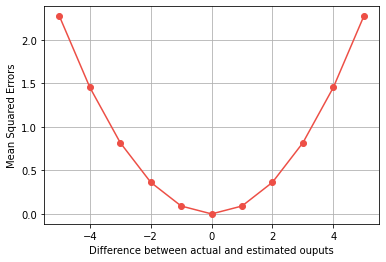

In [7]:
import numpy as np
errors = np.arange(-5, 6)
n = len(errors)
#for i in range(len(train_features)):

  #mse =sum(( train_labels-train_labels[i])**2)/(len(train_features))
mse=errors**2/n
plt.plot(errors, mse, c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Squared Errors')
plt.show()

In [8]:
#OR FOR MSE USE THIS
'''
import numpy as np

errors = np.random.randint(5, size=(2, 4))
n = len(errors)
#for i in range(len(train_features)):

  #mse =sum(( train_labels-train_labels[i])**2)/(len(train_features))
mse=np.sum(errors**2, axis=0)/n
plt.plot(errors, mse, c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Squared Errors')
plt.show()
'''

"\nimport numpy as np\n\nerrors = np.random.randint(5, size=(2, 4))\nn = len(errors)\n#for i in range(len(train_features)):\n\n  #mse =sum(( train_labels-train_labels[i])**2)/(len(train_features))\nmse=np.sum(errors**2, axis=0)/n\nplt.plot(errors, mse, c='#ED4F46', marker='o')\nplt.grid()\nplt.xlabel('Difference between actual and estimated ouputs')\nplt.ylabel('Mean Squared Errors')\nplt.show()\n"

## Mean Absolute Error [MAE]

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations. 

Like MSE, this as well measures the magnitude of error without considering their direction. 

Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first take the absolute difference between the original and estimated output with $|y_i - \hat{y}_i|2$. Then we take sum of the absolute differences for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [9]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mae',
              metrics=['mae'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 13ms/step - loss: 21.4313 - mae: 21.4313 - val_loss: 19.4487 - val_mae: 19.4487
Epoch 2/250
12/12 [==============================] - 0s 4ms/step - loss: 19.2286 - mae: 19.2286 - val_loss: 16.7506 - val_mae: 16.7506
Epoch 3/250
12/12 [==============================] - 0s 4ms/step - loss: 15.8193 - mae: 15.8193 - val_loss: 12.6813 - val_mae: 12.6813
Epoch 4/250
12/12 [==============================] - 0s 4ms/step - loss: 11.3418 - mae: 11.3418 - val_loss: 7.2415 - val_mae: 7.2415
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 7.0024 - mae: 7.0024 - val_loss: 5.5789 - val_mae: 5.5789
Epoch 6/250
12/12 [==============================] - 0s 4ms/step - loss: 5.6576 - mae: 5.6576 - val_loss: 4.3417 - val_mae: 4.3417
Epoch 7/250
12/12 [==============================] - 0s 4ms/step - loss: 4.1958 - mae: 4.1958 - val_loss: 3.6059 - val_mae: 3.6059
Epoch 8/250
12/12 [==============================] - 0s 4ms/step - l

## Question 2

Now that you know how MAE works, you need to plot the behavior of MAE for the synthetic errors given.  

### Answer 2

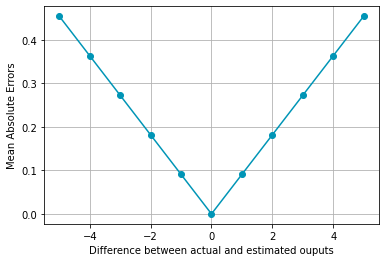

In [10]:
errors = np.arange(-5, 6)
n = len(errors)

mae = abs(errors)/n

plt.plot(errors, mae, c='#0095B6', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Absolute Errors')
plt.show()

## Mean Squared Logarithmic Error [MSLE]

MSLE is just like MSE, but we have to take $log$ of the actual and estimated outputs because squaring and averaging. 

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

We can use MSLE when we don't want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

*Example*: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function.

$$MSLE = \frac{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}{n}$$

In [11]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=['mean_squared_logarithmic_error'])

model.fit(train_features, train_labels, epochs=150, validation_split = 0.1)

Epoch 1/150
12/12 [==============================] - 1s 17ms/step - loss: 6.3716 - mean_squared_logarithmic_error: 6.3716 - val_loss: 4.6021 - val_mean_squared_logarithmic_error: 4.6021
Epoch 2/150
12/12 [==============================] - 0s 4ms/step - loss: 3.7336 - mean_squared_logarithmic_error: 3.7336 - val_loss: 2.5593 - val_mean_squared_logarithmic_error: 2.5593
Epoch 3/150
12/12 [==============================] - 0s 4ms/step - loss: 2.0668 - mean_squared_logarithmic_error: 2.0668 - val_loss: 1.3558 - val_mean_squared_logarithmic_error: 1.3558
Epoch 4/150
12/12 [==============================] - 0s 4ms/step - loss: 1.1010 - mean_squared_logarithmic_error: 1.1010 - val_loss: 0.6893 - val_mean_squared_logarithmic_error: 0.6893
Epoch 5/150
12/12 [==============================] - 0s 4ms/step - loss: 0.5790 - mean_squared_logarithmic_error: 0.5790 - val_loss: 0.3727 - val_mean_squared_logarithmic_error: 0.3727
Epoch 6/150
12/12 [==============================] - 0s 4ms/step - loss: 0

## Question 3

Now that you know how MSLE works, you need to plot the behavior of MSLE for the synthetic errors given.  

### Answer 3

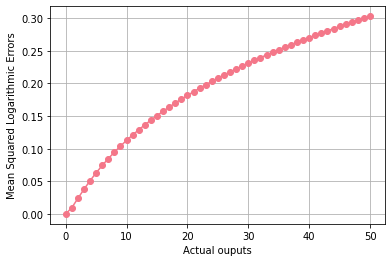

In [12]:
import numpy as np
actual_outputs = np.arange(0, 51)
n = len(actual_outputs)
estimated_outputs = np.zeros(n)

msle = ((np.log(actual_outputs + 1) - np.log(estimated_outputs + 1))**2)/n

plt.plot(actual_outputs, msle, c='#F47789', marker='o')
plt.grid()
plt.xlabel('Actual ouputs')
plt.ylabel('Mean Squared Logarithmic Errors')
plt.show()

## Question 4

Why do we add $1$ to the outputs before passing it through $\log()$? 

#myanswer

bc anything that gets passed into log(a) comes out as a value x that is 10^x=a. adding 1 would make this value bigger. also,
The reason ‘1’ is added to both y and ŷ is for mathematical convenience since log(0)is not defined but both y or ŷ can be 0. good to +1 in case output of the logx is 0. its also to ensure that all output values are above 0 because log0 is undefined.

if just in case y=0 log0 cant work(undef) so add+1 to avoid 0


## Question 5

Write your observations about MSE, MAE, and MSLE; and compare the results achieved with all 3 loss functions. 

#myanswer
##mse includes squared - which is why graph of it is quadratic function like x^2. penalizes large errors harshly (steep curve)
##mae includes absolute error - so absolute value function is what we see in the graph like v shape. penalizes error linearly (bc 2 straight lines). not penalize large errors as harshly as mse.
##msle includes log - so function graph is a log function. penalizes large errors not harshly at all, in fact smaller and larger errors get similar penalty



as for results, in the last epoch:
val_loss: 1.6863 - val_mae: 1.6863
val_loss: 0.0181 - val_mean_squared_logarithmic_error: 0.0181
val_loss: 8.3187 - val_mse: 8.3187

so it looks like msle achieved the lowest loss out of all of them.


## Question 6

Plug-in any of the loss functions from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) docs to the `model.compile` method and see if the difference in model performance as compared to MSE, MAE, and MSLE.

#myanswer
validation mse hovered around 5 or 6, which is still pretty big loss. <br>
validation mae was significantly smaller at around 1.8, but never decreased(1.8 for pretty much all 250 epochs)<br>
validation msle was significantly smaller at around 0.015, but never decreased(0.015 for pretty much all 250 epochs). msle achieved the lowest loss out of all of them.

#why did all 3 losses not decrease? why is my model not learning?
the 3 losses decreased more for train, less for validation testing. 3 losses decreased slower there. means my model is learning training data more than testing data. its still learning tho, just that the losses are stuck in local min. losses  not close to 0 bc its stuck in local min not global min

#what should we put for loss? anything like hinge or cross entropy or pick one of mse mae msle?? 
can only pick mse mae msle bc this is a regression task. loss=cross entropy is used for classification tasks

In [13]:
import tensorflow as tf
import keras
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss= 'mae',
              metrics=["mse", "mae", "msle"])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 16ms/step - loss: 21.8057 - mse: 562.8591 - mae: 21.8057 - msle: 6.9429 - val_loss: 20.0439 - val_mse: 443.4364 - val_mae: 20.0439 - val_msle: 4.8828
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 20.0507 - mse: 487.4513 - mae: 20.0507 - msle: 3.7673 - val_loss: 17.6728 - val_mse: 355.9099 - val_mae: 17.6728 - val_msle: 2.4781
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 16.9531 - mse: 369.8283 - mae: 16.9531 - msle: 1.7744 - val_loss: 13.6003 - val_mse: 222.2737 - val_mae: 13.6003 - val_msle: 0.9347
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 11.7644 - mse: 201.9582 - mae: 11.7644 - msle: 0.5864 - val_loss: 7.7288 - val_mse: 87.4006 - val_mae: 7.7288 - val_msle: 0.2435
Epoch 5/250
12/12 [==============================] - 0s 6ms/step - loss: 7.1844 - mse: 89.2318 - mae: 7.1844 - msle: 0.1792 - val_loss: 5.8896 - val_mse: 57.7765 - val_mae: 5.8896 - 

#Fun Fact

Google Translate is getting better all the time, but it's still not perfect. Translate a sentence into another language and back into English, and you might get a hilarious surprise. That's what Malinda Kathleen Reese got when she reverse Google Translated the lyrics to "Let It Go" from Disney's Frozen into Chinese, Macedonian, French, Polish, Creole, Tamil and others. It doesn't come out as utter gibberish, but as a slightly off version with a slightly different message from the original. Which makes it even funnier. Plus, Malinda can really sing.

Link to video: https://www.youtube.com/watch?v=2bVAoVlFYf0

# Classification Losses

In classification, the outputs are in form of a class or a category. The label or number assigned to the classes do not have a numerical meaning. 

For example, an input with class label 0 cannot be numerically compared with an input with class label 1. 

In [14]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

169017344/169001437 [==============================] - 13s 0us/step


## Kullback-Leibler Divergence [KDL]

Kullback Leibler Divergence Loss is a measure of how a distribution varies from a reference distribution (or a baseline distribution). A Kullback Leibler Divergence Loss of zero means that both the probability distributions are identical.

The number of information lost in the predicted distribution is used as a measure.

$$KDL(p||q) = \int_x p(x) \log \frac{p(x)}{q(x)} dx$$

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 17s 5ms/step - loss: 437.4922 - accuracy: 0.0060 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 437.4920 - accuracy: 0.0075 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 437.4922 - accuracy: 0.0060 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 437.4925 - accuracy: 0.0078 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 437.4926 - accuracy: 0.0023 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 437.4925 - accuracy: 0.0061 - val_loss: 437.4907 - val_accuracy: 0.0000e+00
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 437.4920 - 

##Binary Cross Entropy
Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.

Binary crossentropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right). Several independent such questions can be answered at the same time, as in multi-label classification or in binary image segmentation. Formally, this loss is equal to the average of the categorical crossentropy loss on many two-category tasks.

$$BCE = -\frac{1}{N} \sum_{i=1}^N y_i \cdot \log(p(y_i)) + (1-y_i) \cdot \log(1- p(y_i))$$

In [16]:
training_labels = tf.reshape(tf.one_hot(training_labels, 100), [training_labels.shape[0], 100])
print(training_labels.shape)

test_labels = tf.reshape(tf.one_hot(test_labels, 100), [test_labels.shape[0], 100])
print(test_labels.shape)

(50000, 100)
(10000, 100)


In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0424 - accuracy: 0.1433 - val_loss: 0.0345 - val_accuracy: 0.2158
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0333 - accuracy: 0.2595 - val_loss: 0.0321 - val_accuracy: 0.2880
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0315 - accuracy: 0.3087 - val_loss: 0.0308 - val_accuracy: 0.3233
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0301 - accuracy: 0.3419 - val_loss: 0.0298 - val_accuracy: 0.3517
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.3684 - val_loss: 0.0298 - val_accuracy: 0.3585
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0282 - accuracy: 0.3930 - val_loss: 0.0284 - val_accuracy: 0.3852
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.4115 - val_loss: 0.0277 - val_accuracy:

## Question 7

Do you see any problems/errors with the above code? Please describe.
#myanswer
yes they are using binary cross entropy as the loss for this multiclass task. binary crossentropy should only be used for 2 classes/binary classification tasks. (yes or no, etc). however, this task involves 20 classes



## Categorical Cross Entropy

This is the most common setting for classification problems. Cross-entropy loss increases as the **predicted probability** strays away from the **actual label**.

Note that we have to compare the probabilities (e.g. [0.20, 0.75, 0.05]) of all the classes with the actual labels (e.g., [0, 1, 0]). The actual labels would be one-hot encoding.

An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong.

We are multiplying the log of the actual predicted probability for the ground truth class.

$$CCE = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i)$$ 

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5578 - accuracy: 0.2121 - val_loss: 2.3173 - val_accuracy: 0.2871
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1878 - accuracy: 0.3185 - val_loss: 2.1513 - val_accuracy: 0.3373
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0426 - accuracy: 0.3650 - val_loss: 2.0460 - val_accuracy: 0.3671
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9408 - accuracy: 0.3936 - val_loss: 1.9584 - val_accuracy: 0.3931
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8695 - accuracy: 0.4174 - val_loss: 1.9306 - val_accuracy: 0.4049
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8120 - accuracy: 0.4327 - val_loss: 1.8730 - val_accuracy: 0.4115
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7664 - accuracy: 0.4478 - val_loss: 1.8804 - val_accuracy:

## Question 8

Now that you know how CCE works, you need to code it. It should give the same answer as `tf.keras.metrics.categorical_crossentropy` would.

### Answer 8

#what does N stand for in the categorical cross entropy equation? length of training data so len(true)=len(pred) must be equal

#why must use np.sum and np.log and not sum() and math.log
tf.math.log works too

In [19]:
import tensorflow as tf
import numpy as np
import math
def categorical_crossentropy(true, pred):
    
    loss=np.sum(true*tf.math.log(pred),axis=None) /(-len(pred))
    

    return loss

true = tf.constant([[0.0, 1.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0]])
pred = tf.constant([[0.20, 0.70, 0.10],
                    [0.80, 0.05, 0.15],
                    [0.75, 0.10, 0.15],
                    [0.25, 0.15, 0.60]])

loss = categorical_crossentropy(true, pred)
print(loss)

loss = tf.keras.metrics.categorical_crossentropy(true, pred)
loss = tf.reduce_mean(loss)
print(loss)

0.3445815443992615
tf.Tensor(0.34458154, shape=(), dtype=float32)


## Sparse Categorical Cross Entropy

Both, Categorical Cross Entropy [CCE] and Sparse Categorical Cross Entropy [SCCE] have the same loss function. The only difference is the format of $y_i$ (i.e., true labels).

If $y_i$'s are one-hot encoded, we should use CCE. Examples (for a 3-class classification): [1,0,0], [0,1,0], [0,0,1]

But if $y_i$'s are integers, use SCCE. Examples for above 3-class classification problem: [1], [2], [3]

The usage entirely depends on how we load our dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

$$SCCE = -\log(\hat{y}_i)$$ for $i$ where $one\text{-}hot\text{-}encoding[i] = 1$ 

In [20]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5692 - accuracy: 0.2076 - val_loss: 2.3152 - val_accuracy: 0.2839
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2016 - accuracy: 0.3198 - val_loss: 2.1351 - val_accuracy: 0.3423
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0537 - accuracy: 0.3620 - val_loss: 2.0271 - val_accuracy: 0.3790
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9459 - accuracy: 0.3931 - val_loss: 1.9975 - val_accuracy: 0.3896
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8650 - accuracy: 0.4167 - val_loss: 1.9058 - val_accuracy: 0.4115
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8060 - accuracy: 0.4358 - val_loss: 1.8497 - val_accuracy: 0.4169
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7562 - accuracy: 0.4501 - val_loss: 1.8575 - val_accuracy:

## Question 9

What is the difference between a Multi-class and Multi-label Classification problem, and what sort of loss function would we need to learn them?
#myanswer
Multi-class classification - 1 class for each input only. 1:1 (one input one output) - use sparse categorical cross entropy loss 

Multi-label classification - intput can have multiple classes (this image is both a cat and a lion) - use categorical cross entropy loss 


## Question 10
What is the relationship between Binary Cross entropy and Categorical Cross entropy?

#myanswer
both use cross entropy

differences: binary one is for 2-class classification (binary). categorical one is used for multiple classes (3 or more)


## Question 11

What is the relationship between Sparse Cross entropy and Categorical Cross entropy?

#myanswer
both use categorical loss functions but sparse's input are integers and categorical's are one hot encoded arrays. categorical cross entropy has one hot encoded vectors bc you have multiple classes. 0 0 1 0 (3 wrong, 1 right class)

sparse uses integers take up less space to store. sparse doesnt need one hot encoded vectors.

categorical uses arrays - reduce space by using one hot encoded vectors/arrays




# **Upload this Day 9 Colab Notebook to your Github repository under "Day 9" folder. Also add your *Reflection* on today's learning in README.md**

Sources:

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)